In [1]:
from time import perf_counter
import matplotlib.pyplot as plt

Import 作業所需要的函數

In [2]:
class Fibonacci:
    def top_down(n):
        if n in [0,1]:
            return n
        return Fibonacci.top_down(n-1) + Fibonacci.top_down(n-2)

    def bottom_up(n):
        if n in [0, 1]:
            return n
        f1 = 1
        f2 = 1
        for _ in range(2, n):
            temp = f1 + f2
            f1 = f2
            f2 = temp
        return f2

    def top_down_dynamic(n, seq=[None]*10000):
        if n in [0,1]:
            return n
        if seq[n] == None:
            seq[n] = Fibonacci.top_down_dynamic(n-1, seq) + Fibonacci.top_down_dynamic(n-2, seq)
        return seq[n]

在class中寫入含式

top_down: 沒有任何優化的divide and conquer, 時間複雜度為O(2^n)

bottom_up: 從f1=0、f2=1加到目標數字, 時間複雜度為O(n)

top_down_dynamic: 在top_down的基礎下多建立一個list將已經算過的答案存進去,
在未來有重複的問題時可以直接從list中找答案, 時間複雜度O(n), 空間複雜度O(n)

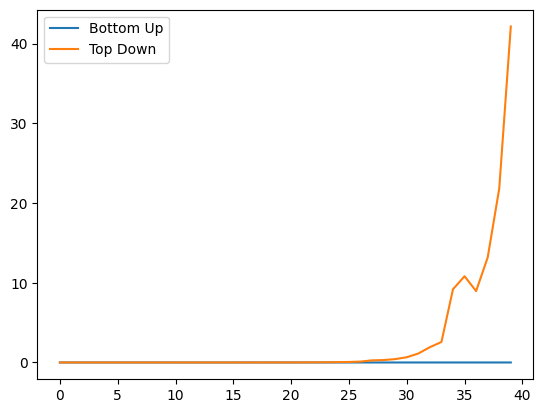

In [3]:
top_time = []
bot_time = []


for i in range(40):
    s = perf_counter()
    Fibonacci.bottom_up(i)
    e = perf_counter()
    bot_time.append(e-s)

    s = perf_counter()
    Fibonacci.top_down(i)
    e = perf_counter()
    top_time.append(e-s)

plt.plot(bot_time, label = "Bottom Up")
plt.plot(top_time, label = "Top Down")
plt.legend()
plt.show()

傳統top_down呈指數性成長, 跑到45以後電腦就崩潰了(1134903170)

bottom_up相較之下快很多

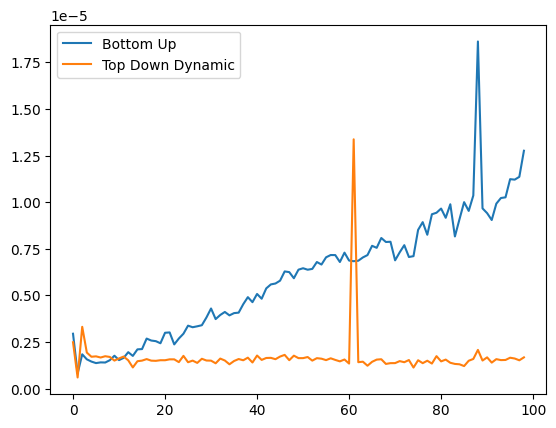

In [4]:
dyn_time = []
bot_time = []
for i in range(99):
    s = perf_counter()
    Fibonacci.bottom_up(i)
    e = perf_counter()
    bot_time.append(e-s)

    s = perf_counter()
    Fibonacci.top_down_dynamic(i)
    e = perf_counter()
    dyn_time.append(e-s)

plt.plot(bot_time, label = "Bottom Up")
plt.plot(dyn_time, label = "Top Down Dynamic")
plt.legend()
plt.show()

Dynamic Programming犧牲了一點記憶體空間來達到更快的速度

In [5]:
class Counting:
    def __init__(self):
        self.top_count = 0
        self.bot_count = 0
        self.dyn_count = 0

    def top_down(self,n):
        if n == 4:
            self.top_count += 1
        if n in [0,1]:
            return n
        return self.top_down(n-1) + self.top_down(n-2)
    def bottom_up(self,n):
        if n in [0, 1]:
            return n
        f1 = 1
        f2 = 1
        for i in range(2, n):
            if i == 4:
                self.bot_count += 1
            temp = f1 + f2
            f1 = f2
            f2 = temp
        return f2

    def top_down_dynamic(self, n, seq=[None]*10000):
        if n == 4:
            self.dyn_count += 1
        if n in [0,1]:
            return n
        if seq[n] == None:
            seq[n] = self.top_down_dynamic(n-1, seq) + self.top_down_dynamic(n-2, seq)
        return seq[n]

調整函數, 如果有算到F(4)就會在變數中加1

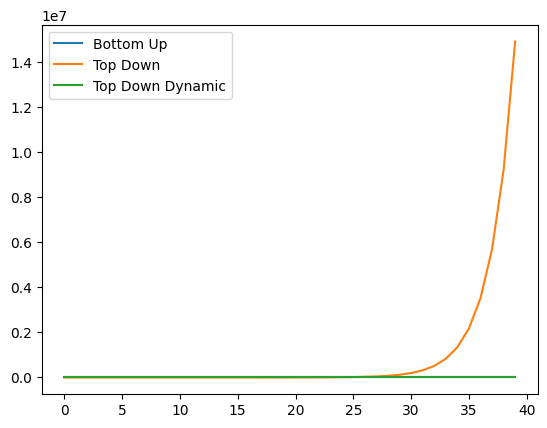

In [8]:
top4 = []
bot4 = []
dyn4 = []
for i in range(4, 49):
    C = Counting()
    C.top_down(i)
    C.bottom_up(i)
    C.top_down_dynamic(i)
    top4.append(C.top_count)
    bot4.append(C.bot_count)
    dyn4.append(C.dyn_count)

plt.plot(bot4, label = "Bottom Up")
plt.plot(top4, label = "Top Down")
plt.plot(dyn4, label = "Top Down Dynamic")
plt.legend()
plt.show()

In [9]:
print(top4)

[0, 0, 0, 0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765, 10946, 17711, 28657, 46368, 75025, 121393, 196418, 317811, 514229, 832040, 1346269, 2178309, 3524578, 5702887, 9227465, 14930352]


bottom_up是從下往上佳來的到解答所以只需要算一次F(4)

top_down_dynamic運用了記憶體來儲存答案, 所以只需要算一次之後就不需要再次運算

top_down會一直重複運算相同的題目, 因此F(4)的計算次數一樣會呈指數性成長